# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('title_clean.csv')
df

,Unnamed: 0,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,service
0,0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,Amazon
1,1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,Amazon
2,2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8,Amazon
3,3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4,Amazon
4,4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6,Amazon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25440,25724,ts305329,House Calls with Dr. Phil,SHOW,The talk show legend travels across the countr...,2021,TV-14,43,['reality'],['US'],1.0,tt15176234,5.4,35.0,0.600,NaN,Paramount
25441,25725,ts291097,Disrupt & Dismantle with Soledad O'Brien,SHOW,NaN,2021,TV-MA,40,['documentation'],[],1.0,tt14315936,3.5,18.0,NaN,NaN,Paramount
25442,25726,tm1100359,Race Against Time: The CIA and 9/11,MOVIE,Follows former top officials and elite operati...,2021,NaN,89,['documentation'],[],NaN,tt15392066,4.6,64.0,2.403,NaN,Paramount
25443,25727,tm1097570,Virus Hunting: Cave to COVID,MOVIE,"As the world battles COVID-19, a team of exper...",2021,NaN,60,[],[],NaN,NaN,NaN,NaN,0.600,NaN,Paramount


In [25]:
df = df.dropna(how='any',axis=0) 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4488 entries, 0 to 25418
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4488 non-null   int64  
 1   id                    4488 non-null   object 
 2   title                 4488 non-null   object 
 3   type                  4488 non-null   object 
 4   description           4488 non-null   object 
 5   release_year          4488 non-null   int64  
 6   age_certification     4488 non-null   object 
 7   runtime               4488 non-null   int64  
 8   genres                4488 non-null   object 
 9   production_countries  4488 non-null   object 
 10  seasons               4488 non-null   float64
 11  imdb_id               4488 non-null   object 
 12  imdb_score            4488 non-null   float64
 13  imdb_votes            4488 non-null   float64
 14  tmdb_popularity       4488 non-null   float64
 15  tmdb_score          

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

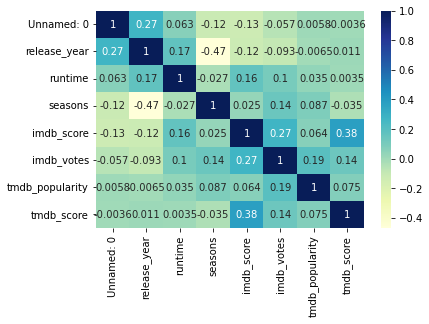

In [27]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


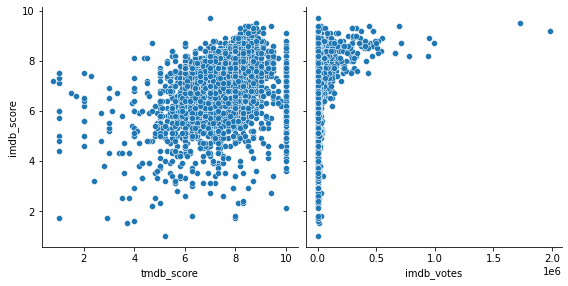

In [28]:
sns.pairplot(df, x_vars=['tmdb_score', 'imdb_votes'], 
             y_vars='imdb_score', size=4, aspect=1, kind='scatter')
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [36]:
x = df['tmdb_score']
y = df['imdb_score']

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
print(x_train)
print(y_train)

21194    6.7
21790    7.6
20436    9.0
18278    9.3
24744    7.6
        ... 
23882    7.8
15241    8.4
5431     4.5
2796     8.2
22100    7.7
Name: tmdb_score, Length: 3141, dtype: float64
21194    6.4
21790    7.6
20436    7.7
18278    6.8
24744    8.3
        ... 
23882    8.5
15241    8.1
5431     7.2
2796     8.7
22100    7.9
Name: imdb_score, Length: 3141, dtype: float64


In [39]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [40]:
lr = sm.OLS(y_train, x_train_sm).fit()

lr.params

const         4.117452
tmdb_score    0.397931
dtype: float64

In [41]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     536.5
Date:                Thu, 25 Aug 2022   Prob (F-statistic):          1.06e-109
Time:                        09:45:20   Log-Likelihood:                -4613.8
No. Observations:                3141   AIC:                             9232.
Df Residuals:                    3139   BIC:                             9244.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1175      0.129     31.863      0.000       3.864       4.371
tmdb_score     0.3979      0.017     23.162      0.000       0.364       0.432
==============================================================================
Omnibus:                      724.825   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1809.534
Skew:                          -1.252   Prob(JB):                         0.00
Kurtosis:                       5.750   Cond. No.                         52.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

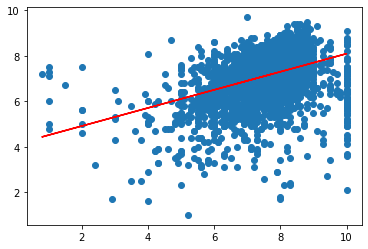

In [43]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 4.117452 + 0.397931*x_train, 'r')
plt.show()

In [44]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

## Error Terms

Finally, plot your error terms!

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


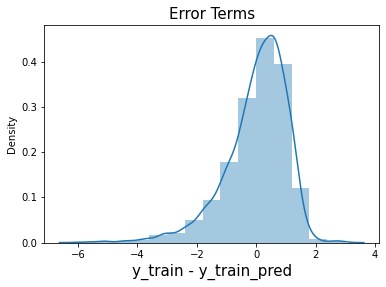

In [45]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.146
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? Probably it would be better to try some one-hot encoding with the categorical variables. 
3. Was your plot of the error terms a bell curve? Kind of, but it is skewed.